In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.constants as const

In [2]:
filename_regular_b = 'table_c1.csv'
filename_grazing_b = 'table_c2.csv'

In [3]:
df_regular_b = pd.read_csv(filename_regular_b)
df_grazing_b = pd.read_csv(filename_grazing_b)

eta_cols = ['min_eta', 'max_eta']
flip_sign = ['a5', 'a3', 'a1', 'min_eta', 'max_eta']
df_grazing_b[flip_sign] *= -1
df_regular_b[flip_sign] *= -1

In [4]:
df_regular_b

,angle,min_eta,max_eta,a6,a5,a4,a3,a2,a1,a0
0,10,0,1,14.875000,-49.285000,64.338000,-42.284000,15.14200,-3.36460,0.9539
1,10,1,10,0.000009,-0.000327,0.004742,-0.035860,0.15259,-0.36505,0.6092
2,5,0,1,18.831000,-62.159000,80.793000,-52.830000,18.80600,-4.11530,0.9438
3,5,1,10,0.000012,-0.000417,0.005937,-0.043777,0.17938,-0.40338,0.5171
4,4,0,1,20.226000,-66.460000,85.922000,-55.849000,19.76400,-4.30040,0.9405
5,4,1,10,0.000012,-0.000434,0.006161,-0.045250,0.18391,-0.40715,0.4908
6,3,0,1,21.588000,-70.675000,90.991000,-58.884000,20.76300,-4.50480,0.9365
7,3,1,10,0.000013,-0.000466,0.006555,-0.047550,0.19011,-0.41084,0.4605


In [5]:
df_grazing_b

,mass,angle,min_eta,max_eta,a6,a5,a4,a3,a2,a1,a0
0,1.0,4,0,1,6.306900,-21.751000,30.084000,-21.648000,9.095200,-2.69010,0.8324
1,1.0,4,1,10,0.000012,-0.000420,0.005960,-0.043776,0.178070,-0.39509,0.4801
2,1.0,3,0,1,1.145200,-4.212000,6.422200,-5.432000,3.046100,-1.41740,0.6316
3,1.0,3,1,10,0.000011,-0.000376,0.005315,-0.038802,0.156670,-0.34397,0.4032
4,1.0,2,0,1,0.185520,-0.741370,1.291300,-1.366500,1.089400,-0.75111,0.4219
5,1.0,2,1,10,0.000008,-0.000277,0.003911,-0.028554,0.115180,-0.25205,0.2899
6,1.0,1,0,1,0.024947,-0.113020,0.239630,-0.337650,0.374300,-0.33265,0.2110
7,1.0,1,1,10,0.000004,-0.000148,0.002088,-0.015203,0.061142,-0.13333,0.1516
8,2.0,3,0,1,10.929000,-36.682000,48.949000,-33.501000,13.033000,-3.39490,0.8720
9,2.0,3,1,10,0.000013,-0.000460,0.006469,-0.046927,0.187660,-0.40583,0.4562


Equation for $u$ - wall approach velocity:
$u = a_6 \zeta^6 +a_5 \zeta^5 +a_4 \zeta^4 +a_3 \zeta^3 +a_2 \zeta^2 + a_1 \zeta + a_0$

In [6]:
df_regular_b.columns

Index([u'angle', u'min_eta', u'max_eta', u'a6', u'a5', u'a4', u'a3', u'a2',
       u'a1', u'a0'],
      dtype='object')

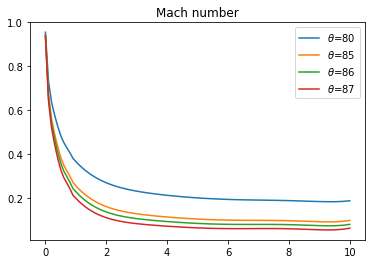

In [19]:
n_points = 100
angles = df_regular_b['angle'].unique()
zeta_space = np.linspace(0, 10, n_points)

for angle in angles:
    u_angle = []
    for zeta in zeta_space:
        poly_coeff_cols = [u'a6', u'a5', u'a4', u'a3', u'a2', u'a1', u'a0']
        idx = (df_regular_b['angle'] == angle) & (df_regular_b['max_eta'] >= zeta) & (df_regular_b['min_eta'] <= zeta)
        poly_coeff = df_regular_b.loc[idx, poly_coeff_cols].values.ravel()
        u_angle.append(np.polyval(poly_coeff, zeta))
    plt.plot(zeta_space, u_angle, label = r'$\theta$={0}'.format(90-angle))

plt.
plt.legend()
plt.title('Mach number')
plt.show(u_angle)

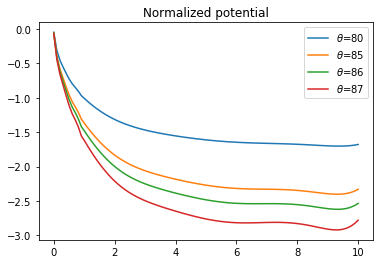

In [22]:
n_points = 100
angles = df_regular_b['angle'].unique()
zeta_space = np.linspace(0, 10, n_points)

for angle in angles:
    u_angle = []
    for zeta in zeta_space:
        poly_coeff_cols = [u'a6', u'a5', u'a4', u'a3', u'a2', u'a1', u'a0']
        idx = (df_regular_b['angle'] == angle) & (df_regular_b['max_eta'] >= zeta) & (df_regular_b['min_eta'] <= zeta)
        poly_coeff = df_regular_b.loc[idx, poly_coeff_cols].values.ravel()
        u_angle.append(np.polyval(poly_coeff, zeta))
    plt.plot(zeta_space, np.log(u_angle), label = r'$\theta$={0}'.format(90-angle))
plt.legend()
plt.title('Normalized potential')
plt.show(u_angle)

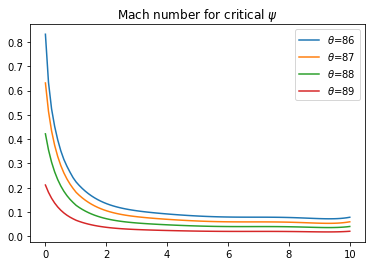

In [20]:
n_points = 100
mass = 1
angles = df_grazing_b['angle'].unique()
zeta_space = np.linspace(0, 10, n_points)

for angle in angles:
    u_angle = []
    for zeta in zeta_space:
        poly_coeff_cols = [u'a6', u'a5', u'a4', u'a3', u'a2', u'a1', u'a0']
        idx = (df_grazing_b['angle'] == angle) & (df_grazing_b['max_eta'] >= zeta) & (df_grazing_b['min_eta'] <= zeta) & (df_grazing_b['mass'] == mass)
        poly_coeff = df_grazing_b.loc[idx, poly_coeff_cols].values.ravel()
        u_angle.append(np.polyval(poly_coeff, zeta))
    plt.plot(zeta_space, u_angle, label = r'$\theta$={0}'.format(90-angle))
plt.legend()
plt.title('Mach number for critical $\psi$')
plt.show(u_angle)

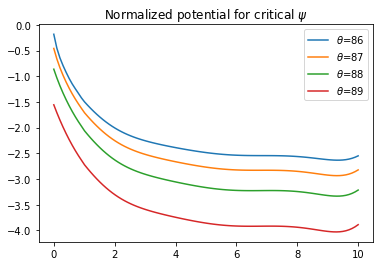

In [24]:
n_points = 100
mass = 1
angles = df_grazing_b['angle'].unique()
zeta_space = np.linspace(0, 10, n_points)

for angle in angles:
    u_angle = []
    for zeta in zeta_space:
        poly_coeff_cols = [u'a6', u'a5', u'a4', u'a3', u'a2', u'a1', u'a0']
        idx = (df_grazing_b['angle'] == angle) & (df_grazing_b['max_eta'] >= zeta) & (df_grazing_b['min_eta'] <= zeta) & (df_grazing_b['mass'] == mass)
        poly_coeff = df_grazing_b.loc[idx, poly_coeff_cols].values.ravel()
        u_angle.append(np.polyval(poly_coeff, zeta))
    plt.plot(zeta_space, np.log(u_angle), label = r'$\theta$={0}'.format(90-angle))
plt.legend()
plt.title('Normalized potential for critical $\psi$')
plt.show(u_angle)